# Importing libraries

In [242]:
import numpy as np
import pandas as pd

In [243]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [244]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
424,ham,Send this to ur friends and receive something ...,NaN,NaN,NaN
3971,ham,WOT U UP 2 J?,NaN,NaN,NaN
1072,spam,Dear U've been invited to XCHAT. This is our f...,NaN,NaN,NaN
4993,ham,My drive can only be read. I need to write,NaN,NaN,NaN
42,spam,07732584351 - Rodger Burns - MSG = We tried to...,NaN,NaN,NaN


In [245]:
df.shape

(5572, 5)

# 1. Data cleaning

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [247]:
# drop last 3 columns

In [248]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [249]:
df.sample(3)

,v1,v2
4088,ham,"How are you, my Love ? Are you with your broth..."
4964,ham,"A few people are at the game, I'm at the mall ..."
1193,spam,Sex up ur mobile with a FREE sexy pic of Jorda...


In [250]:
# Renaming the cols

df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [251]:
df.sample(5)

,target,text
5327,ham,Wishing you a wonderful week.
4417,ham,"When you get free, call me"
5124,ham,He is impossible to argue with and he always t...
2722,ham,It's justbeen overa week since we broke up and...
2424,ham,Oh k k:)but he is not a big hitter.anyway good


In [252]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [253]:
df['target'] = encoder.fit_transform(df['target'])

In [254]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [255]:
# missing value

df.isnull().sum()

target    0
text      0
dtype: int64

In [256]:
# check for duplicate values

df.duplicated().sum()

403

In [257]:
# remove duplicates

df = df.drop_duplicates(keep='first')

In [258]:
df.duplicated().sum()

0

In [259]:
df.shape

(5169, 2)

# 2. EDA

In [260]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [261]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

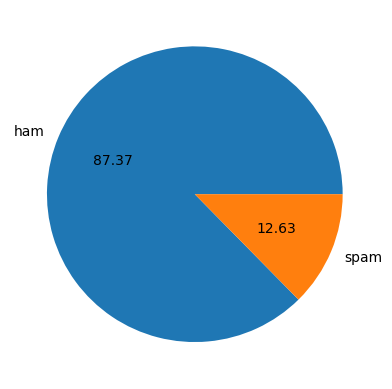

In [262]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

plt.show()

In [263]:
# Data is imbalanced

In [264]:
import nltk

In [265]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP.DESKTOP-5IHNLMQ\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!


True

In [266]:
df['num_char'] = df['text'].apply(len)

In [267]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [268]:
# number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [269]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [270]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [271]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [272]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [273]:
#ham
df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [274]:
# spam

df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [275]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

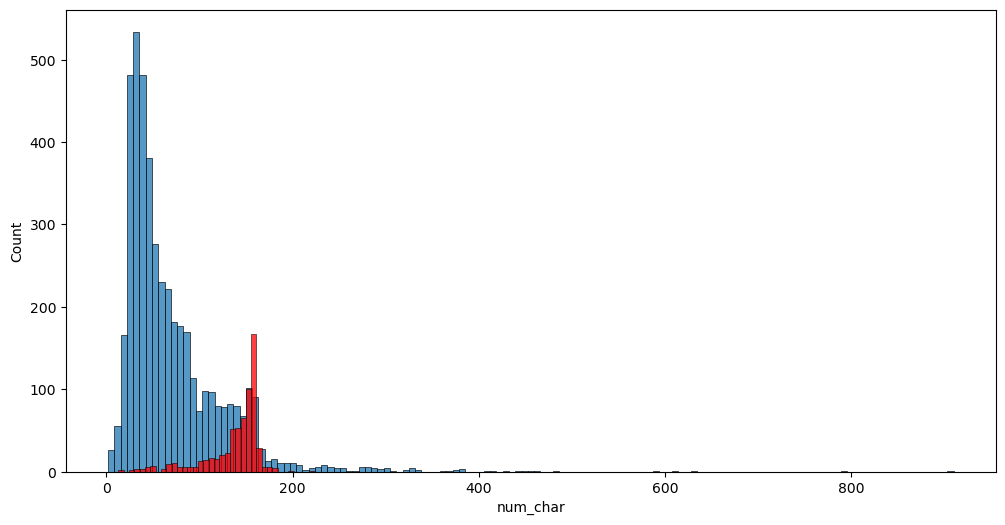

In [276]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

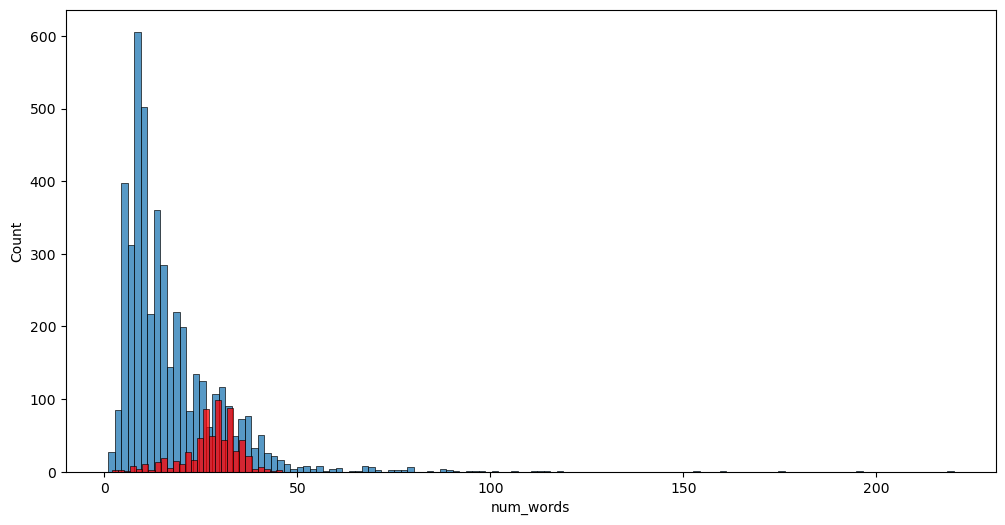

In [277]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

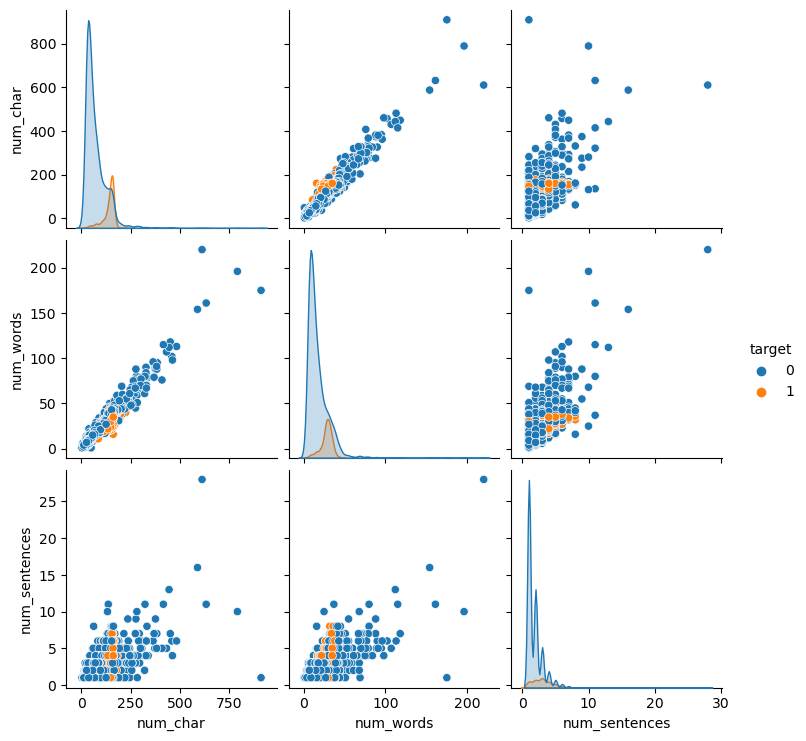

In [278]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

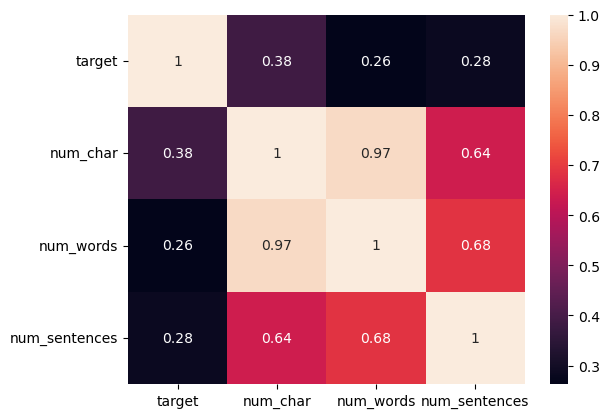

In [279]:
sns.heatmap(df.corr(), annot=True)

# 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words punchuation
* Stemming

In [280]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [281]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [282]:
transform_text('I loved the YT lectures on Mchine Learing . How are you?')

'love yt lectur mchine lear'

In [283]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
ps.stem('loving')

'love'

In [284]:
df['transformed_text'] = df['text'].apply(transform_text)

In [285]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [286]:
from wordcloud import WordCloud

wc = WordCloud(width=750, height=750, min_font_size=10, background_color='white')

In [287]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

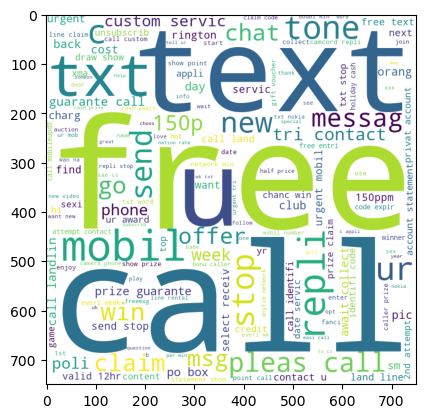

In [288]:
plt.imshow(spam_wc)

In [289]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

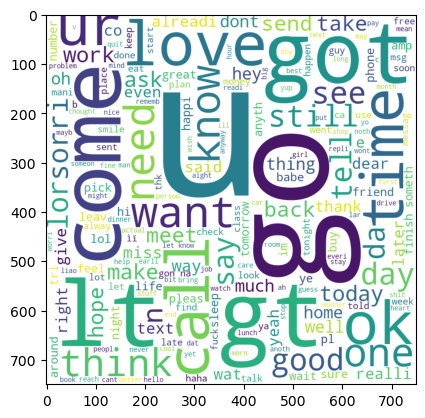

In [290]:
plt.imshow(ham_wc)

In [291]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [292]:
len(spam_corpus)

9939

C:\Users\HP.DESKTOP-5IHNLMQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


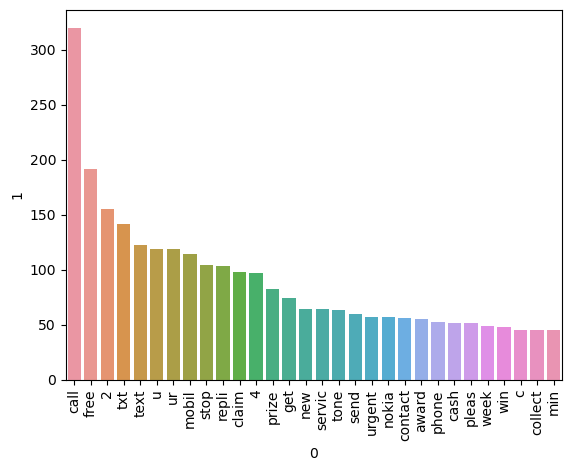

In [293]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

In [294]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [295]:
len(ham_corpus)

35394

C:\Users\HP.DESKTOP-5IHNLMQ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


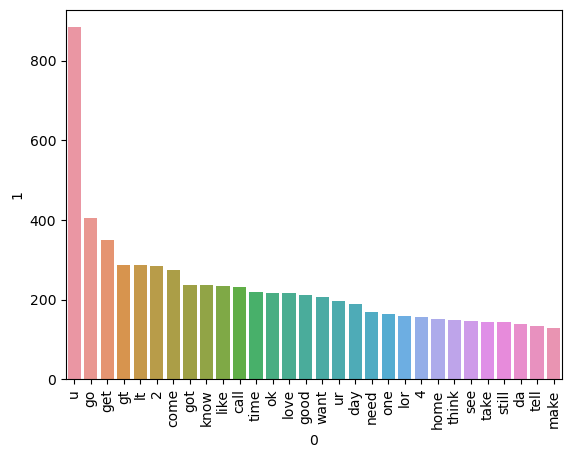

In [296]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [297]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [298]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [299]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [300]:
x.shape

(5169, 3000)

In [301]:
y = df['target'].values

In [302]:
#y

In [303]:
from sklearn.model_selection import train_test_split

In [304]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [305]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [306]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [307]:
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [308]:
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [309]:
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [310]:
# tfidf --- mnb

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [312]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [313]:
clfs = {
    'SVC': svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [314]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [315]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [316]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9758220502901354
0.9747899159663865


In [317]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\Users\HP.DESKTOP-5IHNLMQ\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  Adaboost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  Bgc
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [318]:
performance_df = pd.DataFrame({'Algorithem':clfs.keys(), 'Accuaracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [319]:
performance_df

,Algorithem,Accuaracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,Adaboost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,Bgc,0.957447,0.867188


In [320]:
 performance_df1 = pd.melt(performance_df, id_vars='Algorithem')

In [321]:
performance_df1

,Algorithem,variable,value
0,KN,Accuaracy,0.905222
1,NB,Accuaracy,0.970986
2,RF,Accuaracy,0.974855
3,SVC,Accuaracy,0.975822
4,ETC,Accuaracy,0.974855
5,LR,Accuaracy,0.958414
6,xgb,Accuaracy,0.971954
7,Adaboost,Accuaracy,0.960348
8,GBDT,Accuaracy,0.947776
9,Bgc,Accuaracy,0.957447


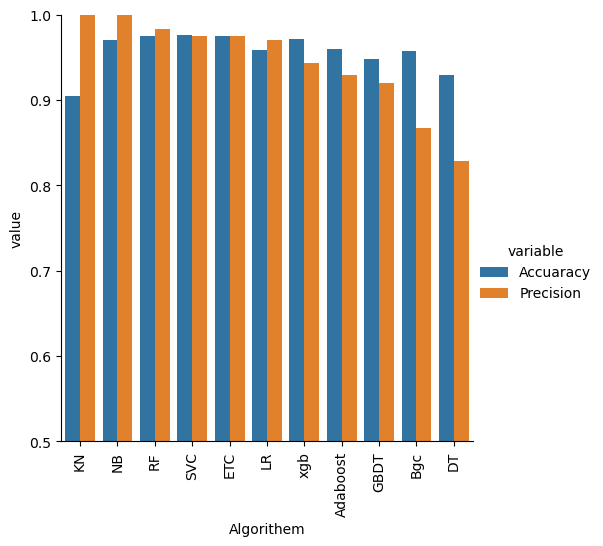

In [323]:
sns.catplot(x='Algorithem', y='value', hue='variable',
           data=performance_df1, kind='bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [325]:
# voting classifier

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [326]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('etc', etc)], voting='soft')

In [327]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [328]:
y_pred = voting.predict(X_test)
print('Accuracy - ', accuracy_score(y_test, y_pred))
print('Precision - ', precision_score(y_test, y_pred))

Accuracy -  0.9825918762088974
Precision -  0.9918032786885246


In [329]:
# Apply stacking 

estimators = [('svm', svc), ('nb', mnb), ('et',etc)]
final_estimator = RandomForestClassifier()

In [330]:
from sklearn.ensemble import StackingClassifier

In [331]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [332]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy - ', accuracy_score(y_test, y_pred))
print('Precision - ', precision_score(y_test, y_pred))

Accuracy -  0.9777562862669246
Precision -  0.9259259259259259


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model'))